In [ ]:
%autosave 0

# Solving the Wolf-Goat-Cabbage Problem

An agricultural economist has to sell a *wolf*, a *goat*, and a *cabbage* on a market place.  In order to
reach the market place, she has to cross a river.  The boat that she can use is so small that it can
only accommodate either the goat, the wolf, or the cabbage in addition to the agricultural economist.
Now if the agricultural economist leaves the wolf alone with the goat, the wolf will eat the goat.
If, instead, the agricultural economist leaves the goat with the cabbage, the goat will eat the cabbage.
Is it possible for the agricultural economist to develop a schedule that allows her to cross the river
without either the goat or the cabbage being eaten?

## Auxilliary Procedures for Computing a Path in a Graph

The function <tt>dot_graph</tt> below is used to create a visual representation of a graph.  The graph is assumed to be represented as a set of pairs.

In [1]:
import graphviz as gv

def dot_graph(R):
    """This function takes binary relation R as inputs and shows this relation as
       a graph using the module graphviz.
    """
    dot = gv.Digraph()
    Nodes = { p[0] for p in R }.union({ p[1] for p in R })
    for n in Nodes:
        dot.node(str(set(n)))
    for (x, y) in R:
        dot.edge(str(set(x)), str(set(y)))
    return dot

The function $\texttt{power}(M)$ defined below computes the power set of the set $M$, i.e. we have:
$$ \texttt{power}(M) = 2^M = \bigl\{A \mid A \subseteq M \} $$

In [4]:
def power(M):
    "This function computes the power set of the set M."
    if M == set():
        return { frozenset() }
    else:
        C  = set(M)  # C is a copy of M as we don't want to change the set M
        x  = C.pop() # pop removes the element x from the set C
        P1 = power(C)
        P2 = { A.union({x}) for A in P1 }
        return P1.union(P2)

The function <tt>pathProduct</tt> below takes a set of pathes <tt>P<tt> and a binary relation <tt>R</tt> as its arguments.  If there is a path $L \in P$ that has the form $L = (x_1, \cdots, x_n)$ and there is a pair $(x_n, x_{n+1}) \in R$, then the path $(x_1, \cdots, x_n, x_{n+1})$ is an element of the set of pathes computed by this function.

In [5]:
def pathProduct(P, R):
    return { T1 + (T2[1],) for T1 in P for T2 in R 
                           if T1[-1] == T2[0] and not T2[-1] in T1 
           }

The function <tt>findPath</tt> takes three arguments:
<ol>
    <li><tt>start</tt> is a node in a graph.</li>
    <li><tt>goal</tt> is a node in a graph.</li>
    <li><tt>R</tt> is a graph represented as a set of pairs of nodes.</li>
</ol>
The function tries to find a path that leads from <tt>start</tt> to <tt>goal</tt>.  If no path is found, the function returns <tt>None</tt>.

In [7]:
def findPath(start, goal, R):
    """
    start and goal are nodes in a graph, while R is a set of pairs of nodes.
    R is interpreted as a relation.  The function findPath tries to find
    a path from start to goal.
    """
    P = { (start,)}                      # pathes beginning at start
    while len(P) > 0:                         
        P     = pathProduct(P, R)
        Found = { T for T in P if T[-1] == goal }
        if Found != set():
            return Found.pop()

## Problem Specific Code

There is a problem if the wolf is alone with the goat or if the goat is alone with the cabbage.

In [10]:
def problem(S):
    """
    S is a set of objects that are at one shore of the river.
    This function returns <tt>True</tt> if there is a problem.
    """
    return ('farmer' not in S) and             \
           (('goat' in S and 'cabbage' in S) or   # goat eats cabbage
            ('wolf' in S and 'goat'    in S)   )  # wolf eats goat

At the start, everything is on the left shore.

In [11]:
All = frozenset({'farmer', 'wolf', 'goat', 'cabbage'})

<tt>States</tt> is the set of all states that do not have a problem.

In [12]:
States = { S for S in power(All) if not problem(S) and not problem(All - S) }
States

{frozenset(),
 frozenset({'farmer', 'goat'}),
 frozenset({'wolf'}),
 frozenset({'farmer', 'goat', 'wolf'}),
 frozenset({'cabbage'}),
 frozenset({'cabbage', 'wolf'}),
 frozenset({'cabbage', 'farmer', 'goat'}),
 frozenset({'cabbage', 'farmer', 'wolf'}),
 frozenset({'goat'}),
 frozenset({'cabbage', 'farmer', 'goat', 'wolf'})}

<tt>R1</tt> decribes the transitions where the boat crosses the river from left to right.

In [13]:
R1 = { (S, S - B) for S in States for B in power(S)
                  if S - B in States and 'farmer' in B and len(B) <= 2
     }
R1

{(frozenset({'farmer', 'goat'}), frozenset()),
 (frozenset({'farmer', 'goat', 'wolf'}), frozenset({'wolf'})),
 (frozenset({'cabbage', 'farmer', 'wolf'}), frozenset({'cabbage'})),
 (frozenset({'cabbage', 'farmer', 'wolf'}), frozenset({'cabbage', 'wolf'})),
 (frozenset({'farmer', 'goat'}), frozenset({'goat'})),
 (frozenset({'cabbage', 'farmer', 'goat'}), frozenset({'goat'})),
 (frozenset({'farmer', 'goat', 'wolf'}), frozenset({'goat'})),
 (frozenset({'cabbage', 'farmer', 'goat'}), frozenset({'cabbage'})),
 (frozenset({'cabbage', 'farmer', 'wolf'}), frozenset({'wolf'})),
 (frozenset({'cabbage', 'farmer', 'goat', 'wolf'}),
  frozenset({'cabbage', 'wolf'}))}

<tt>R2</tt> is the inverse of <tt>R1</tt>.

In [14]:
R2 = { (S2, S1) for (S1, S2) in R1 }

In [15]:
R = R1.union(R2)

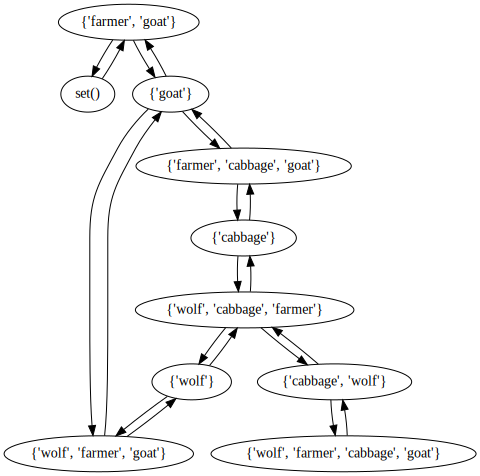

In [16]:
dot = dot_graph(R)
dot

In [17]:
dot.render('wolf-goat-cabbage')

'wolf-goat-cabbage.pdf'

At the beginning everything is on the left shore and nothing is on the right shore.   The goal is to have everybody on the right shore.  In that case, the left shore will be empty.

In [18]:
start = All
goal  = frozenset()
Path  = findPath(start, goal, R)
Path

(frozenset({'cabbage', 'farmer', 'goat', 'wolf'}),
 frozenset({'cabbage', 'wolf'}),
 frozenset({'cabbage', 'farmer', 'wolf'}),
 frozenset({'cabbage'}),
 frozenset({'cabbage', 'farmer', 'goat'}),
 frozenset({'goat'}),
 frozenset({'farmer', 'goat'}),
 frozenset())

## Auxiliary Code for Pretty Printing

The following code is used for printing the path that has been found.  We won't discuss the details of these functions.

In [19]:
def mkPair(S, All):
    "Given the left shore, compute both the left shore and the right shore."
    return (S, All - S);

def my_str(s):
    "Print frozen sets as sets."
    if len(s) == 0:
        return "{}"
    else:
        return str(set(s))
    
def printPath(Path, All):
    "print the path one transition at a time"
    for i in range(len(Path)):
        (S1, S2) = mkPair(Path[i], All)
        if (len(S1) == 0 or len(S2) == 0):
            print(my_str(S1), 33 * " ", my_str(S2))
        else:
            print(my_str(S1), 35 * " ", my_str(S2))
        if i + 1 == len(Path): 
            break
        (T1, T2) = mkPair(Path[i+1], All)        
        if "farmer" in S1:
            B = S1 - T1  # the boat crossing from left to right
            print("                         >>>> ", B, " >>>> ")
        else:
            B = S2 - T2  # the boat crossing from right to left
            print("                         <<<< ", B, " <<<< ")
printPath(Path, All)

{'wolf', 'cabbage', 'goat', 'farmer'}                                   {}
                         >>>>  frozenset({'farmer', 'goat'})  >>>> 
{'cabbage', 'wolf'}                                     {'farmer', 'goat'}
                         <<<<  frozenset({'farmer'})  <<<< 
{'wolf', 'cabbage', 'farmer'}                                     {'goat'}
                         >>>>  frozenset({'farmer', 'wolf'})  >>>> 
{'cabbage'}                                     {'goat', 'farmer', 'wolf'}
                         <<<<  frozenset({'farmer', 'goat'})  <<<< 
{'farmer', 'cabbage', 'goat'}                                     {'wolf'}
                         >>>>  frozenset({'cabbage', 'farmer'})  >>>> 
{'goat'}                                     {'farmer', 'cabbage', 'wolf'}
                         <<<<  frozenset({'farmer'})  <<<< 
{'farmer', 'goat'}                                     {'cabbage', 'wolf'}
                         >>>>  frozenset({'goat', 'farmer'})  >>>> 
{}          